In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import pytorch_lightning as pl
import torch
import wandb
from sdofm import utils
from sdofm.datasets import SDOMLDataModule, SynopticSDOMLDataModule
from sdofm.pretraining import SAMAE
import numpy as np

In [3]:
import omegaconf

# cfg = omegaconf.OmegaConf.load("../experiments/pretrain_32.2M_samae.yaml")
cfg = omegaconf.OmegaConf.load("../experiments/default.yaml")

In [5]:
data_module = SynopticSDOMLDataModule(
    hmi_path=os.path.join(
        cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.hmi
    ),
    aia_path=os.path.join(
        cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.aia
    ),
    # os.path.join(
    #     cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.aia
    # ),
    eve_path=None,
    components=cfg.data.sdoml.components,
    wavelengths=cfg.data.sdoml.wavelengths,
    ions=cfg.data.sdoml.ions,
    frequency=cfg.data.sdoml.frequency,
    batch_size=1,
    num_workers=cfg.data.num_workers,
    val_months=[],  # [1,2,3,4,5,6,7,8,9,10,11,12],
    test_months=[],
    holdout_months=cfg.data.month_splits.holdout,
    cache_dir=os.path.join(
        cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.cache
    ),
    num_frames=2760,
    min_date=cfg.data.min_date,
    max_date=cfg.data.max_date,
)
data_module.setup()

[* CACHE SYSTEM *] Found cached index data in /mnt/sdoml/cache/aligndata_AIA_FULL_HMI_FULL_12min.csv.
[* CACHE SYSTEM *] Found cached normalization data in /mnt/sdoml/cache/normalizations_AIA_FULL_HMI_FULL_12min.json.
[* CACHE SYSTEM *] Found cached HMI mask data in /mnt/sdoml/cache/hmi_mask_512x512.npy.


In [6]:
dl = torch.utils.data.DataLoader(
    data_module.train_ds,
    batch_size=data_module.batch_size,
    num_workers=data_module.num_workers,
    shuffle=False,
    drop_last=True,
)

In [12]:
import sunpy.visualization.colormaps as cm

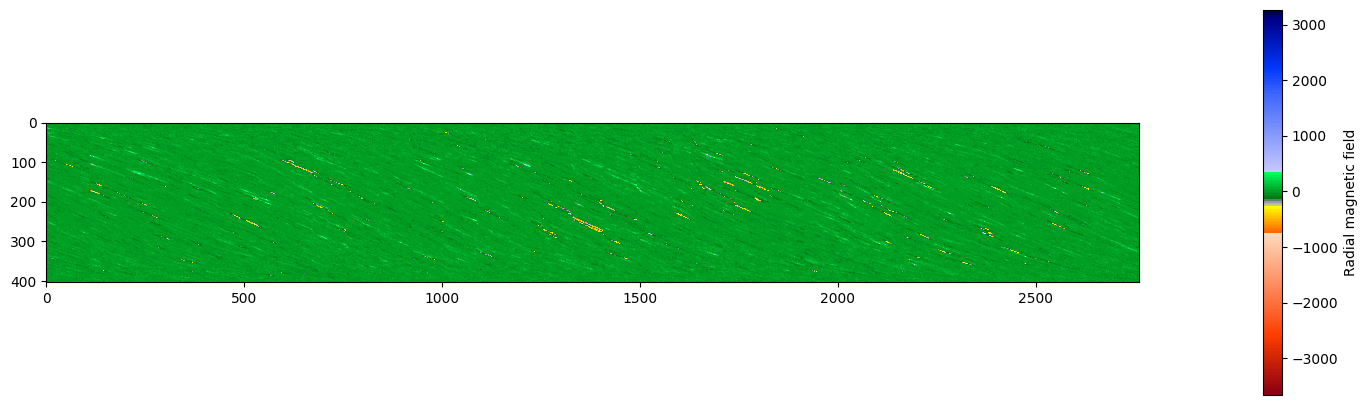

In [21]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(16, 5))
# ax = plt.subplot(projection=syn_map)

out = band.reshape(band.shape[0], band.shape[1], band.shape[-1])[2, :, :].T * 100
im = plt.imshow(out, cmap=matplotlib.colormaps["hmimag"])
cb = plt.colorbar(im, fraction=0.019, pad=0.1)
cb.set_label(f"Radial magnetic field")
# ax.coords.grid(color="black", alpha=0.6, linestyle="dotted", linewidth=0.5)
plt.show()